In [3]:
import random
import matplotlib.pyplot as plt


In [5]:
def print_solution(board):
    for row in board:
        print(" ".join(str(x) for x in row))
    print()

In [7]:
def print_solution(board):
    for row in board:
        print(" ".join(str(x) for x in row))
    print()

In [9]:
def plot_solution(board):
    n = len(board)
    fig, ax = plt.subplots()
    ax.set_xticks(range(n))
    ax.set_yticks(range(n))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(True)
    for i in range(n):
        for j in range(n):
            if board[i][j] == 1:
                ax.add_patch(plt.Circle((j, n - i - 1), 0.4, color='black'))
    plt.show()


In [11]:
def plot_fitness_over_generations(fitness_history):
    plt.figure()
    plt.plot(range(len(fitness_history)), fitness_history, marker='o')
    plt.xlabel('Generation')
    plt.ylabel('Best Fitness')
    plt.title('Mutation Impact Over Generations')
    plt.grid(True)
    plt.show()

In [13]:
def is_safe(board, row, col, n):
    # Check if a queen can be placed at board[row][col]
    for i in range(col):
        if board[row][i] == 1:
            return False

    for i, j in zip(range(row, -1, -1), range(col, -1, -1)):
        if board[i][j] == 1:
            return False

    for i, j in zip(range(row, n), range(col, -1, -1)):
        if board[i][j] == 1:
            return False

    return True

In [15]:

def solve_n_queens(board, col, n):
    if col >= n:
        print_solution(board)
        plot_solution(board)
        return True

    res = False
    for i in range(n):
        if is_safe(board, i, col, n):
            board[i][col] = 1
            res = solve_n_queens(board, col + 1, n) or res
            board[i][col] = 0

    return res

In [17]:
def n_queens(n):
    board = [[0] * n for _ in range(n)]
    if not solve_n_queens(board, 0, n):
        print("No solution exists")

In [23]:
def genetic_algorithm(n, s, r, p, m):
    def fitness(board):
        conflicts = 0
        for i in range(n):
            for j in range(i + 1, n):
                if board[i] == board[j] or abs(board[i] - board[j]) == abs(i - j):
                    conflicts += 1
        return -conflicts

    def mutate(board):
        if random.random() < p:
            idx = random.randint(0, n - 1)
            board[idx] = random.randint(0, n - 1)

    def crossover(parent1, parent2):
        point = random.randint(0, n - 1)
        return parent1[:point] + parent2[point:]

    population = [[random.randint(0, n - 1) for _ in range(n)] for _ in range(s)]
    fitness_history = []
    for generation in range(m):
        population.sort(key=fitness, reverse=True)
        best_fitness = fitness(population[0])
        fitness_history.append(best_fitness)
        next_generation = population[:r]
        while len(next_generation) < s:
            if r > 1:
                parent1, parent2 = random.sample(population[:r], 2)
                child = crossover(parent1, parent2)
            else:
                # If breeding pair size is 1, just mutate the existing parent
                child = population[0][:]
                mutate(child)
            mutate(child)
            next_generation.append(child)
        population = next_generation

    best_solution = max(population, key=fitness)
    print("Best solution found:")
    board = [[0] * n for _ in range(n)]
    for i in range(n):
        board[i][best_solution[i]] = 1
    print_solution(board)
    plot_solution(board)
    plot_fitness_over_generations(fitness_history)

    # Adding remarks based on the fitness history
    final_fitness = fitness_history[-1]
    if final_fitness == 0:
        print("Remarks: Optimal solution found with no conflicts.")
    elif final_fitness < 0 and final_fitness > -10:
        print("Remarks: Near-optimal solution with few conflicts. Consider increasing generations or population size.")
    else:
        print("Remarks: Suboptimal solution with many conflicts. Consider adjusting parameters such as mutation probability or breeding pairs.")


Number of queens (N):  10
Population size (S):  10
Number of breeding pairs (r):  2
Mutation probability (p):  0.1
Number of generations (m):  10


Best solution found:
0 0 0 0 0 0 0 1 0 0
0 1 0 0 0 0 0 0 0 0
0 0 0 1 0 0 0 0 0 0
0 0 0 0 0 0 0 1 0 0
0 1 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 1 0
0 0 0 0 0 0 0 0 0 1
0 0 0 0 0 1 0 0 0 0
1 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 1 0



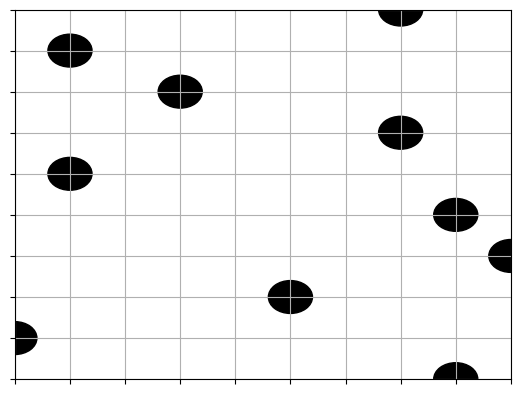

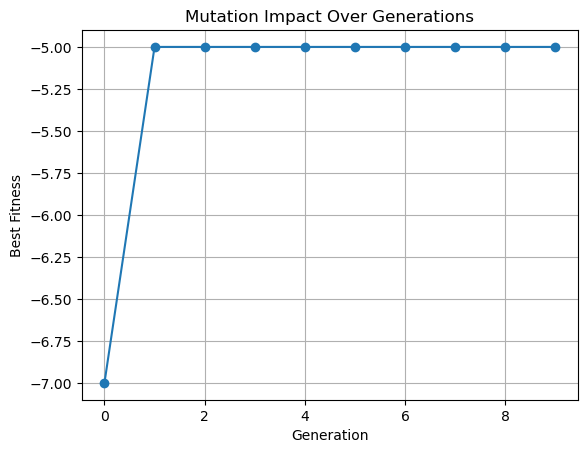

Remarks: Near-optimal solution with few conflicts. Consider increasing generations or population size.


In [25]:
if __name__ == "__main__":
    n = int(input("Number of queens (N): "))
    s = int(input("Population size (S): "))
    r = int(input("Number of breeding pairs (r): "))
    p = float(input("Mutation probability (p): "))
    m = int(input("Number of generations (m): "))
    genetic_algorithm(n, s, r, p, m)